In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter


from sklearn.ensemble import RandomForestClassifier



import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [13]:
df_train = pd.read_csv('/Users/CLEVO/Documents/datasets/train.csv')
df_test = pd.read_csv('/Users/CLEVO/Documents/datasets/test.csv')



In [14]:
df_train.drop(columns = ['Unnamed: 0','PhraseId','SentenceId'], inplace = True)

df_train.sample(5)

,Phrase,Sentiment
32827,"for the kiddies , with enough eye",2
106968,Sterile And Lacking,2
37182,the big summer movies,3
89188,and onscreen personas,2
10446,like a cold old man going through the motions,0


<AxesSubplot:xlabel='Sentiment'>

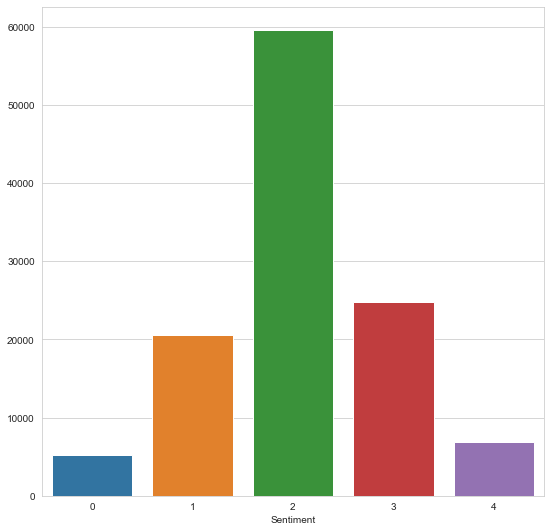

In [15]:
a = df_train.groupby(['Sentiment']).size()
plt.figure(figsize = (9,9))
sns.barplot(a.index, a.values)

In [16]:
import re 

def preprocessor(text):
    """ Return a cleaned version of text
    """
    # Remove HTML markup
#     text = re.sub('<[^>]*>', '', text)
    # Save emoticons for later appending
#     emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    # Remove any non-word character and append the emoticons,
    # Also Convert to lower case
    text = (re.sub('[\W]+', ' ', text.lower())) #+ ' ' + ' '.join(emoticons).replace('-', ''))
    
    return text

# Create some random texts for testing the function preprocessor()
print(preprocessor('I like it!!! |||<><>'))

i like it 


In [17]:

# Split a text into list of words
def tokenizer(text):
    return text.split()


In [18]:
###### from sklearn.model_selection import train_test_split

X = df_train['Phrase']
y = df_train['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

Xr = df_test['Phrase']


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# tfidf = TfidfVectorizer(tokenizer=tokenizer,
#                        preprocessor=preprocessor)

count = CountVectorizer(ngram_range=(1,2),
                       lowercase=True,
                       preprocessor=preprocessor,
                           max_df=1.0)

# A pipeline is what chains several steps together, once the initial exploration is done. 
# For example, some codes are meant to transform features — normalise numericals, or turn text into vectors, 
# or fill up missing data, they are transformers; other codes are meant to predict variables by fitting an algorithm,
# they are estimators. Pipeline chains all these together which can then be applied to training data
clf = Pipeline([('vect', count),
                ('clf', LogisticRegression(random_state=0, multi_class='multinomial', verbose=1))])



clf.fit(X_train, y_train)

## class_weight = 'balanced'
# although the data set is not balanced. balancing the dataset through class_weight reduces accuracy
# 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.9s finished


Pipeline(steps=[('vect',
                 CountVectorizer(ngram_range=(1, 2),
                                 preprocessor=<function preprocessor at 0x000000000508C0D8>)),
                ('clf',
                 LogisticRegression(multi_class='multinomial', random_state=0,
                                    verbose=1))])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Now apply those above metrics to evaluate your model
# Your code here
predictions = clf.predict(X_test)
print('accuracy:',accuracy_score(y_test,predictions))
print('confusion matrix:\n',confusion_matrix(y_test,predictions))
print('classification report:\n',classification_report(y_test,predictions))

accuracy: 0.6562006066042975
confusion matrix:
 [[  355   443   200    11     0]
 [  338  1712  1910   115    11]
 [   66   776 10223   859    41]
 [    7    85  1984  2543   363]
 [    0     6   138   695   528]]
classification report:
               precision    recall  f1-score   support

           0       0.46      0.35      0.40      1009
           1       0.57      0.42      0.48      4086
           2       0.71      0.85      0.77     11965
           3       0.60      0.51      0.55      4982
           4       0.56      0.39      0.46      1367

    accuracy                           0.66     23409
   macro avg       0.58      0.50      0.53     23409
weighted avg       0.64      0.66      0.64     23409



Text(0.5, 16.0, 'Predicted label')

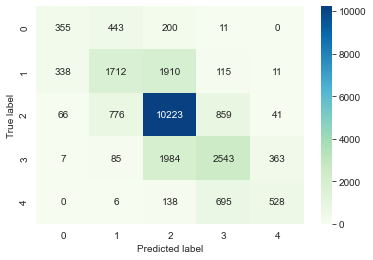

In [26]:
cm = confusion_matrix(y_test, predictions)
# view with a heatmap
sns.heatmap(cm, annot=True,fmt='g', cmap='GnBu', xticklabels=['0','1','2','3','4'], yticklabels=['0','1','2','3','4'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

# positive, slightly positive, neutral, slightly negative, or negative)

In [27]:
#break down into 5 seperate dataframes
df_train_0_category = df_train[df_train.Sentiment == 0]
df_train_1_category = df_train[df_train.Sentiment == 1]
df_train_2_category = df_train[df_train.Sentiment == 2]
df_train_3_category = df_train[df_train.Sentiment == 3]
df_train_4_category = df_train[df_train.Sentiment == 4]



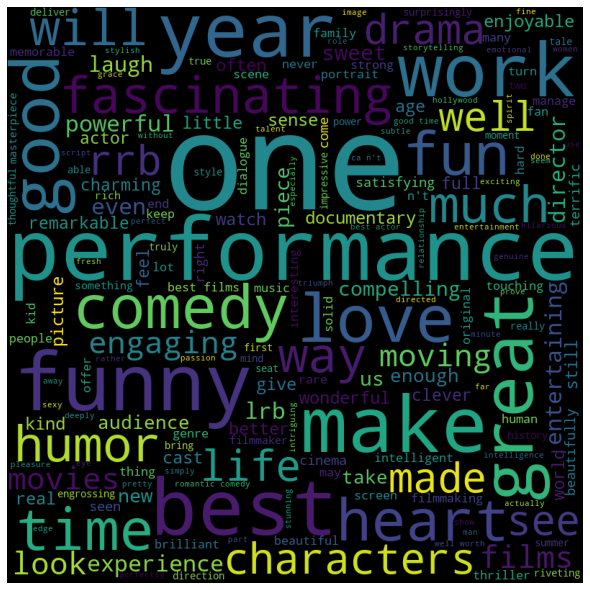

In [28]:
from wordcloud import WordCloud, STOPWORDS 


comment_words = '' 
stopwords = set(STOPWORDS)
newstopwords = ['movie','film','Character','story']

for i in newstopwords:
        stopwords.add(i)

#WordCloud

for val in df_train_4_category.Phrase:
    val = str(val)
    tokens = val.split()
       
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words +=" ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='Black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
    

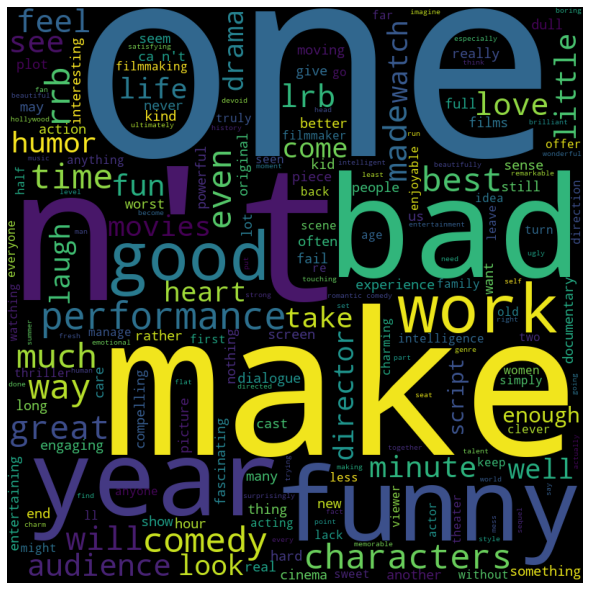

In [29]:
for val in df_train_0_category.Phrase:
    val = str(val)
    tokens = val.split()
       
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words +=" ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='Black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
    

In [30]:
testpredictions = clf.predict(Xr)

In [31]:
df_test['Sentiment Prediction'] = testpredictions.tolist()

In [32]:
df_test.sample(5)

,PhraseId,Phrase,Sentiment Prediction
21758,21758,itself does n't stand a ghost of a chance,1
550,550,When a movie asks you to feel sorry for Mick J...,1
16213,16213,into the deepest recesses of the character to ...,2
6417,6417,Here the love scenes all end in someone scream...,1
16308,16308,above kiddie fantasy pablum,2


In [33]:
df_test.to_csv('/Users/CLEVO/Documents/datasets/submission.csv')